<a href="https://colab.research.google.com/github/Annie50P/Laboratorio4-DatagridView/blob/master/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install split-folders pillow ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 130.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:

from roboflow import Roboflow
rf = Roboflow(api_key="ZGbiZ7VdW3V1wOJ6ZyKt")
project = rf.workspace("ana-patricia-aparicio").project("tables-ard1z-jt1j1")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tables-1 in yolov8:: 100%|██████████| 5865/5865 [00:00<00:00, 5866.71it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from ultralytics import settings
settings.update({'datasets_dir':'/content/Tables-1/data.yaml'})

In [4]:
from ultralytics import YOLO
# cargar modelo
model = YOLO("yolov8n.pt")

In [5]:

# entrenar el modelo
model.train(
    data='/content/Tables-1/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    name="Entrenamiendo_mesas",
    project="proyecto_mesas"
 )

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Tables-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Entrenamiendo_mesas, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aab235f8d40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
import os
import pandas as pd
#listar archivos en el directorio
directorio ="/content/proyecto_mesas/Entrenamiendo_mesas"
if os.path.exists(directorio):
  print("archivos en el directorio")
  print(os.listdir(directorio))
else:
  print(f"El directorio{directorio} no existe.")

archivos en el directorio
['BoxPR_curve.png', 'weights', 'val_batch1_pred.jpg', 'confusion_matrix.png', 'train_batch1.jpg', 'train_batch13502.jpg', 'train_batch0.jpg', 'confusion_matrix_normalized.png', 'train_batch13501.jpg', 'labels.jpg', 'results.png', 'args.yaml', 'train_batch13500.jpg', 'BoxF1_curve.png', 'BoxR_curve.png', 'val_batch2_labels.jpg', 'results.csv', 'train_batch2.jpg', 'BoxP_curve.png', 'val_batch1_labels.jpg', 'val_batch0_pred.jpg', 'val_batch0_labels.jpg', 'val_batch2_pred.jpg']


In [7]:
#crear dataframe de métricas de entrenamiento
df_metrics= pd.read_csv("/content/proyecto_mesas/Entrenamiendo_mesas/results.csv")

#mostrar métricas
print(df_metrics.head(5))
print(df_metrics.index.to_list())
print(df_metrics.columns.to_list())

print(df_metrics.describe())

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   57.193         0.78539         1.44827         1.27988   
1      2  107.075         0.89523         1.14304         1.34250   
2      3  156.305         0.93541         1.05357         1.36968   
3      4  203.968         0.91288         0.97597         1.35096   
4      5  253.007         0.86450         0.92473         1.32988   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.81139            0.76592           0.83143   
1               0.41640            0.37005           0.36145   
2               0.77300            0.75606           0.81977   
3               0.84008            0.85886           0.90124   
4               0.87768            0.83976           0.88440   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.48827       1.16020       1.80250       1.81837  0.000662   
1              0.14530       2.03667       2

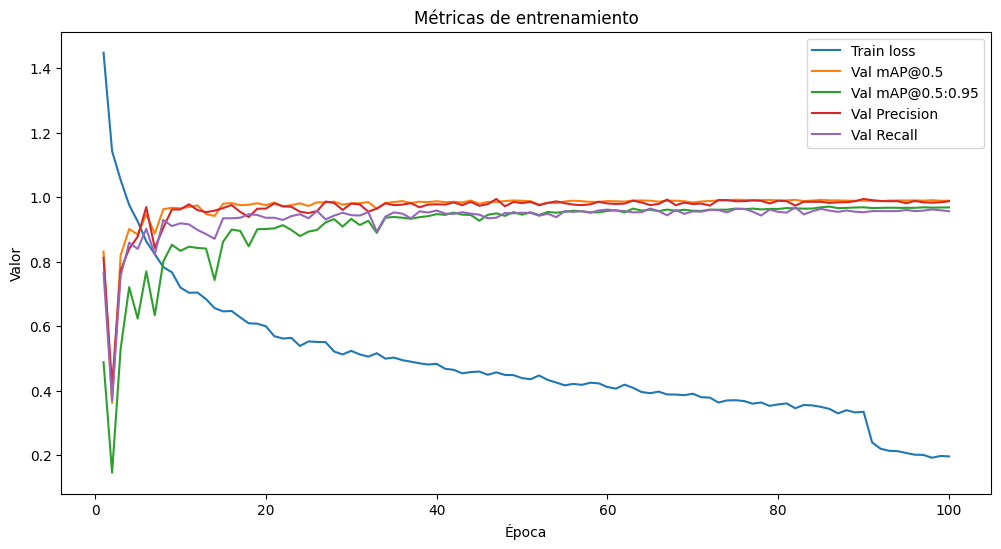

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_metrics['epoch'], df_metrics['train/cls_loss'], label='Train loss')
plt.plot(df_metrics['epoch'], df_metrics['metrics/mAP50(B)'], label='Val mAP@0.5')
plt.plot(df_metrics['epoch'], df_metrics['metrics/mAP50-95(B)'], label='Val mAP@0.5:0.95')
plt.plot(df_metrics['epoch'], df_metrics['metrics/precision(B)'], label='Val Precision')
plt.plot(df_metrics['epoch'], df_metrics['metrics/recall(B)'], label='Val Recall')

plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('Métricas de entrenamiento')
plt.legend()
plt.show()


In [11]:
#evaluar el model
resultados=model.val()
print(resultados)

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 893.4±1421.1 MB/s, size: 60.9 KB)
val: Scanning /content/Tables-1/valid/labels.cache... 531 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 531/531 832.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 34/34 4.6it/s 7.3s
                   all        531        581      0.984      0.958       0.99       0.97
Speed: 2.0ms preprocess, 5.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aab3f4f6c00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Preci

In [ ]:
#cargar el modelo entrenado
modelo_entrenado = YOLO("/content/proyecto_mesas/Entrenamiendo_mesas/weights/best.pt")

#realizar inferencia en una imagen
resultados= modelo_entrenado.predict(source="")